In [1]:
#coding:utf-8
import os
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#接続情報

dbh = pymysql.connect(
         host=os.getenv('MYSQL_HOST'),
         user=os.getenv('MYSQL_USER'),
         password=os.getenv('MYSQL_PASSWORD'),
         db=os.getenv('MYSQL_DATABASE'),
         charset='utf8',
         cursorclass=pymysql.cursors.DictCursor
    )

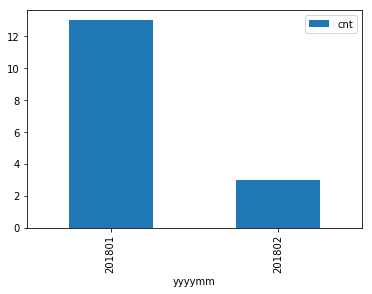

In [3]:
query = '''
  SELECT
    DATE_FORMAT(created_at, '%Y%m') yyyymm,
    count(*) cnt
  FROM
    users
  WHERE
    created_at > '2018-01-01'
  GROUP BY
    yyyymm
'''
df = pd.read_sql_query(
    query,
    dbh)
df.index = df['yyyymm']
p = df.tail(10).plot.bar()

In [4]:
dbh.close()